## SMV Classifier using White wine data set
This is the second part of wine quality analysis. in 1st part we saw how we got accuracy using different kernals and how we used Grid search and cross validation to find best score.
in this part we will look how we can imporove the acuracy and how we can classify quality of wine.

In [254]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.preprocessing import MinMaxScaler,StandardScaler,normalize
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [255]:
df_wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv",sep=";")

In [256]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [257]:
## Lets replace the data column space between columns name
df_wine.columns =  df_wine.columns.str.replace(" ","_")

In [258]:
df_wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [259]:
df_wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


As we can see that datas are not in a same scale so we will standardize the data.

In [260]:
#Now seperate the wine dataset as response variable("quality") and feature variabes
X = df_wine.drop("quality",axis=1)
y = df_wine["quality"]

In [261]:
print(X.shape)
print(y.shape)
print(type(X))
print(type(y))

(4898, 11)
(4898,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [262]:
X_cols = list(X)
print(X_cols)

['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [263]:
## Lets do scaling on features variables using Standard Scaler
def normalization(X):
    sc = StandardScaler()
    X_scale = sc.fit_transform(X)
    return X_scale

In [264]:
## Lets do scalling on features cariables using Normalization
#Normalization ==> x_norm = (x - mean)/std 
#it gives for each value the same value intervals means between 0-1
#def normalization(X):
#    mean = np.mean(X)
#    std = np.std(X)
#    X_t = (X - mean)/std
#    return X_t

Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. For machine learning, every dataset does not require normalization. It is required only when features have different ranges.

In [265]:
X_scale = normalization(X)

In [266]:
X_scale

array([[ 1.72096961e-01, -8.17699008e-02,  2.13280202e-01, ...,
        -1.24692128e+00, -3.49184257e-01, -1.39315246e+00],
       [-6.57501128e-01,  2.15895632e-01,  4.80011213e-02, ...,
         7.40028640e-01,  1.34184656e-03, -8.24275678e-01],
       [ 1.47575110e+00,  1.74519434e-02,  5.43838363e-01, ...,
         4.75101984e-01, -4.36815783e-01, -3.36667007e-01],
       ...,
       [-4.20473102e-01, -3.79435433e-01, -1.19159198e+00, ...,
        -1.31315295e+00, -2.61552731e-01, -9.05543789e-01],
       [-1.60561323e+00,  1.16673788e-01, -2.82557040e-01, ...,
         1.00495530e+00, -9.62604939e-01,  1.85757201e+00],
       [-1.01304317e+00, -6.77100966e-01,  3.78559282e-01, ...,
         4.75101984e-01, -1.48839409e+00,  1.04489089e+00]])

In [208]:
df_X_scale = pd.DataFrame(X_scale,columns = X_cols)

In [209]:
df_X_scale.min()

fixed_acidity          -3.620351
volatile_acidity       -1.966985
citric_acid            -2.761743
residual_sugar         -1.141944
chlorides              -1.683274
free_sulfur_dioxide    -1.958677
total_sulfur_dioxide   -3.044230
density                -2.313038
pH                     -3.101408
sulphates              -2.364709
alcohol                -2.043297
dtype: float64

In [210]:
df_X_scale.max()

fixed_acidity            8.705106
volatile_acidity         8.153643
citric_acid             10.956420
residual_sugar          11.714112
chlorides               13.743076
free_sulfur_dioxide     14.918314
total_sulfur_dioxide     7.098444
density                 15.031298
pH                       4.184075
sulphates                5.171602
alcohol                  2.995326
dtype: float64

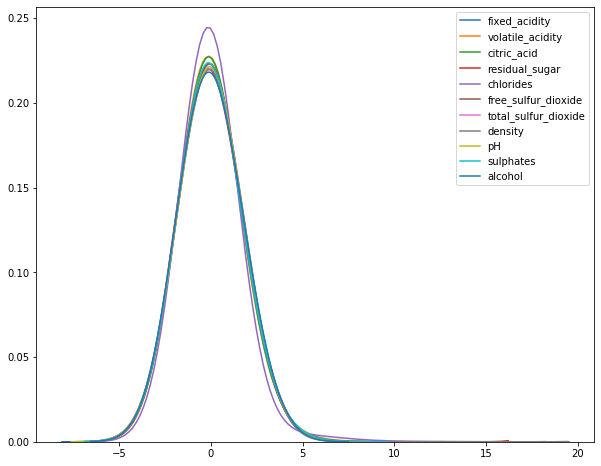

In [211]:
plt.figure(figsize=(10,8))
i = []
for i in X_cols:
    sns.kdeplot(df_X_scale[i],bw=1.5)

Now we can see variables are scaled on same value and having mean = 0

In [212]:
### Lets split the train and test
X_train,X_test,y_train,y_test = train_test_split(X_scale,y,test_size = 0.3,random_state = 42)

In [213]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3428, 11)
(3428,)
(1470, 11)
(1470,)


#### Lets apply different ML algorithm to find the accuracy usinf cross validation and Grid-Search
WE will use below classifier
1. Logistic Regression
2. Decision Tree
3. Ensemble Model - Random Foreset
4. SVM
5. KNN
6. Naive Bayes

**Lets create a common function to get the accuracy score and plot the learning curve, confusion matrix**

In [108]:
## Create generalize function
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from IPython.display import Image 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import ShuffleSplit
from mlxtend.plotting import plot_confusion_matrix
from sklearn import svm

def grid_search(name_clf, clf, X_train, X_test, y_train, y_test):
    if name_clf == 'Logistic_Regression':
        # Logistic Regression --
        log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.1, 1, 10, 100]}
        grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
        grid_log_reg.fit(X_train, y_train)
        # We will get the logistic regression with the best parameters and best score.
        log_reg = grid_log_reg.best_estimator_
        print("Best Parameters for Logistic Regression: ", grid_log_reg.best_estimator_)
        print("Best Score for Logistic Regression: ", grid_log_reg.best_score_)
        print("------------------------------------------")
        return log_reg
    
    elif name_clf == 'Decision_Tree':
        # DecisionTree Classifier
        tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,30,1)), 
                  "min_samples_leaf": list(range(5,20,1))}
        grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
        grid_tree.fit(X_train, y_train)
        # tree best estimator
        tree_clf = grid_tree.best_estimator_
        print("Best Parameters for Decision Tree: ", grid_tree.best_estimator_)
        print("Best Score for Decision Tree: ", grid_tree.best_score_)
        print("------------------------------------------")
        
        #FEATURE IMPORTANCE FOR DECISION TREE
        importnce = tree_clf.feature_importances_
        plt.figure(figsize=(10,10))
        plt.title("Feature Importances of Decision Tree")
        plt.barh(X_cols, importnce, align="center")
        
        return tree_clf
    
    elif name_clf == 'Random_Forest':
        forest_params = {"bootstrap":[True, False], "max_depth": list(range(2,10,1)), 
                  "min_samples_leaf": list(range(5,20,1))}
        grid_forest = GridSearchCV(RandomForestClassifier(), forest_params)
        grid_forest.fit(X_train, y_train)
        # forest best estimator
        forest_clf = grid_forest.best_estimator_
        print("Best Parameters for Random Forest: ", grid_forest.best_estimator_)
        print("Best Score for Random Forest: ", grid_forest.best_score_)
        print("------------------------------------------")
        
        #FEATURE IMPORTANCE FOR DECISION TREE
        importnce = forest_clf.feature_importances_
        plt.figure(figsize=(10,10))
        plt.title("Feature Importances of Random Forest")
        plt.barh(X_cols, importnce, align="center")
        
        return forest_clf

    elif name_clf == 'SVM':
        # Support Vector Classifier
        svc_params = {'C':[0.1, 1.0, 10.0, 100.0],
                      'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
        grid_svc = GridSearchCV(svm.SVC(), svc_params)
        grid_svc.fit(X_train, y_train)
        # SVC best estimator
        svc = grid_svc.best_estimator_
        print("Best Parameters for SVM: ", grid_svc.best_estimator_)
        print("Best Score for SVM: ", grid_svc.best_score_)
        print("------------------------------------------")
        return svc

    elif name_clf == 'KNN':
        # Support Vector Classifier
        knn_params = {"n_neighbors" : range(1,21),
                       "weights":["uniform","distance"],
                       "metric":["euclidean", "manhattan", "chebyshev", "minkowski"]}
        grid_knn = GridSearchCV(KNeighborsClassifier(), knn_params)
        grid_knn.fit(X_train, y_train)
        # SVC best estimator
        knn = grid_knn.best_estimator_
        print("Best Parameters for KNN: ", grid_knn.best_estimator_)
        print("Best Score for KNN: ", grid_knn.best_score_)
        print("------------------------------------------")
        return knn

                      
    elif name_clf == 'Naive Bayes':
        # Support Vector Classifier
        gnb_params = {}
        grid_gnb = GridSearchCV(GaussianNB(), gnb_params)
        grid_gnb.fit(X_train, y_train)
        # SVC best estimator
        gnb = grid_gnb.best_estimator_
        print("Best Parameters for NB: ", grid_gnb.best_estimator_)
        print("Best Score for NB: ", grid_gnb.best_score_)
        print("------------------------------------------")
        return gnb
                      
def plot_learning_curve(estimator,title, X, y, ylim=None, cv=None, n_jobs=None,
                        train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, 
                                                            n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

#Create classification funciton
def classification(name_clf, clf, X_train, X_test, y_train, y_test):
    #Find the best parameters and get the classification with the best parameters as return value of grid search
    grid_clf = grid_search(name_clf, clf, X_train, X_test, y_train, y_test)
    
    #Plotting the learning curve
    # score curves, each time with 30% data randomly selected as a validation set.
    cv_split = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
    plot_learning_curve(grid_clf, name_clf, X_train, y_train, 
                    ylim=(0.1, 1.01), cv=cv_split, n_jobs=4)
    
    #Apply cross validation to estimate the skills of model with cv =10 split with using best parameters(got from grid search)
    scores = cross_val_score(grid_clf, X_train, y_train, cv=10)
    print("Mean Accuracy of Cross Validation: %", round(scores.mean()*100,2))
    print("Std of Accuracy of Cross Validation: %", round(scores.std()*100))
    print("------------------------------------------")
    
    #Predict the test data as selected classifier
    clf_prediction = grid_clf.predict(X_test)
    ##clf1_accuracy = sum(y_test == clf_prediction)/len(y_test)
    clf1_accuracy = metrics.accuracy_score(y_test,clf_prediction)
    print("Accuracy of",name_clf,":",clf1_accuracy*100)
    
    #print confusion matrix and accuracy score before best parameters
    clf1_conf_matrix = confusion_matrix(y_test, clf_prediction)
    print("Confusion matrix of",name_clf,":\n", clf1_conf_matrix)
    plot_confusion_matrix(conf_mat=clf1_conf_matrix)
    print("==========================================")
    return grid_clf

##### Classification using Logistic Regresstion
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Logistic regression is analyzing a dataset in which there are one or more independent variables that determine an outcome. The outcome is measured with a dichotomous variable (in which there are only two possible outcomes). It is used to predict a binary outcome (1 / 0, Yes / No, True / False) given a set of independent variables. Logistic regression is a classification algorithm used to assign observations to a discrete set of classes. **For this wine datset, firstly we are using ordinal logistic regression then we will use binary logistic regression with modified dataset(As we can see that our predicted outcome is quality that is not a binary outcome so we will transform the value into binary form)**. Formulation of the logistic regression: P= 1/(1+ e^(-(b_0+ b_1 x)) ).

**Note :** ROC curves are typically used in binary classification to study the output of a classifier. In order to extend ROC curve and ROC area to multi-label classification, it is necessary to binarize the output. One ROC curve can be drawn per label, but one can also draw a ROC curve by considering each element of the label indicator matrix as a binary prediction (micro-averaging).

Another evaluation measure for multi-label classification is macro-averaging, which gives equal weight to the classification of each label.

Best Parameters for Logistic Regression:  LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Best Score for Logistic Regression:  0.5376284820497542
------------------------------------------
Mean Accuracy of Cross Validation: % 53.91
Std of Accuracy of Cross Validation: % 3.0
------------------------------------------
Accuracy of Logistic_Regression : 54.08163265306123
Confusion matrix of Logistic_Regression :
 [[  0   0   3   2   1   1   0]
 [  0   1  20  19   0   0   0]
 [  0   1 235 188   2   0   0]
 [  0   0 126 496  45   0   1]
 [  0   0  22 195  63   0   0]
 [  0   0   2  35  12   0   0]
 [  0   0   0   0   0   0   0]]


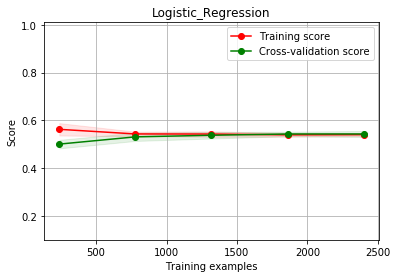

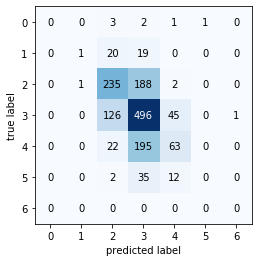

In [109]:
logreg = LogisticRegression()
lgclf = classification("Logistic_Regression",logreg,X_train,X_test,y_train,y_test)

##### Classification using Decision Tree

Tree models where the target variable can take a discrete set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels.A decision tree is drawn upside down with its root at the top involves partitioning the data into subsets that contain instances with similar values (homogenous), then on the middle there are condition/internal node based on the tree split into branches/edges. The end of the branch that doesn’t split anymore it is the decision/leaf tree, means that they are the last classification nodes(qualities). The base algorithm of the decision tree; recursive binary splitting. In this procedure, all the features are considered and different split points are tried and tested using a cost function. The split with the best cost (or lowest cost) is selected. The cost function is used to understand how model split and predict the split dataset classifications.

Best Parameters for Decision Tree:  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=21, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Best Score for Decision Tree:  0.5419978293715818
------------------------------------------
Mean Accuracy of Cross Validation: % 53.15
Std of Accuracy of Cross Validation: % 3.0
------------------------------------------
Accuracy of Decision_Tree : 53.87755102040816
Confusion matrix of Decision_Tree :
 [[  0   0   3   4   0   0]
 [  0  15  14   9   2   0]
 [  0  23 250 136  15   2]
 [  0  13 150 388 105  12]
 [  1   3  15 122 130   9]
 [  1   0   2  17  20   9]]


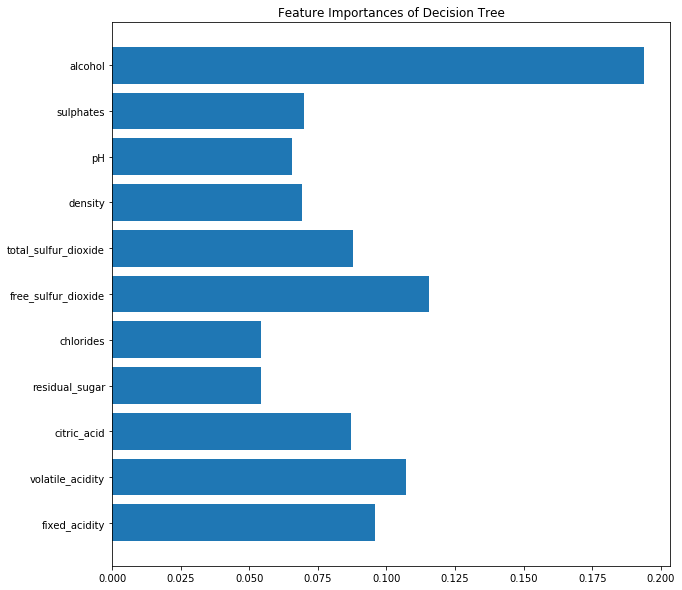

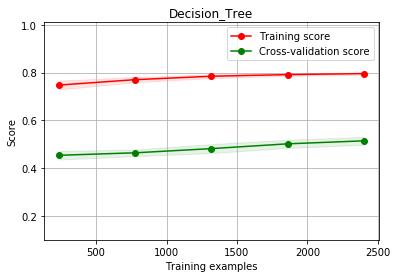

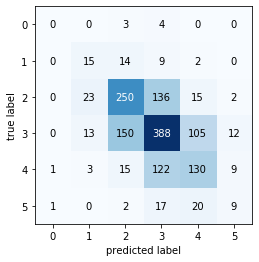

In [110]:
dtree = DecisionTreeClassifier()
dtclf = classification("Decision_Tree",dtree,X_train,X_test,y_train,y_test)

In [111]:
##os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"
##os.environ['PATH'] = os.environ['PATH']+';'+r"C:\E\Data_Science\ML_Software\graphviz\bin"

In [112]:
from sklearn.tree import export_graphviz
import graphviz 
##from sklearn.externals.six import StringIO
from IPython.display import Image

#Plot the decision tree 
dot_data = export_graphviz(dtclf, out_file=None, filled=True, rounded=True,special_characters=True)
graph = graphviz.Source(dot_data)
graph.view()

### Graph is very large so take output in pdf and view directly in pdf format

'Source.gv.pdf'

##### Classification using SVM

**SVM Support Vector Machine is a discriminative classifier by a separating hyperplane and supervised learning technique for Machine Learning.** Differently from the unsupervised learning algorithms, there is a dataset belongs to different classes(labels). Data is trained with those class labels and then it is predicted with test data set then calculate accuracy how the algorithm predicts test data correctly. In other words, separating dataset into labeled training and test(categorize) dataset with labeled data, it could be better with work with as binary classification. In more detail, SVM uses margin and hyperplane instead of line to separate data into two or more different class. In order to separate classes, it can be drawn many different lines but by choosing best line it is considered that margin should be maximum in between support vectors which are the closest points with different classes. While SVM algorithm is working, it follows two rules which are firstly classify correctly, then increase the margins in hyperplane. Additionally, **SVM is useful for non-linear classification by increasing dimension then find a new line classification in increased dimension.** The C parameter tells the SVM optimization how many misclassifying point of each training example. For large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly. Conversely, a very small value of C will cause the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points. For very tiny values of C, there are misclassified examples, often even if training data is linearly separable.

Small C makes the cost of misclassificaiton low ("soft margin"), thus allowing more of them for the sake of wider "cushion".

Large C makes the cost of misclassification high ('hard margin"), thus forcing the algorithm to explain the input data stricter and potentially overfit.

The goal is to find the balance between "not too strict" and "not too loose". Cross-validation and resampling, along with grid search, are good ways to finding the best C.

Intuitively, the gamma parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’. The gamma parameters can be seen as the inverse of the radius of influence of samples selected by the model as support vectors.

The C parameter trades off misclassification of training examples against simplicity of the decision surface. A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly by giving the model freedom to select more samples as support vectors.

Cost and Gamma are the hyper-parameters that decide the performance of an SVM model. There should be a fine balance between Variance and Bias for any ML model. (this is a science and an art - as we call it in empirical studies)

For SVM , a High value of Gamma leads to more accuracy but biased results and vice-versa. Similarly, a large value of Cost parameter (C) indicates poor accuracy but low bias and vice-versa.

In [113]:
svc = svm.SVC()
svmclf = classification("SVM",svc,X_train, X_test, y_train, y_test)

##### Classification using KNN

The k-nearest neighbors (KNN) algorithm is a simple, easy-to-implement, non-parametric ,used for classification and regressionsupervised machine learning algorithm that can be used to solve both classification and regression problems.In both cases, the input consists of the k closest training examples in the feature space. The output depends on whether k-NN is used for classification or regression.

In KNN classification, the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.

In KNN regression, the output is the property value for the object. This value is the average of the values of k nearest neighbors.

Best Parameters for KNN:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='distance')
Best Score for KNN:  0.6452746270562448
------------------------------------------
Mean Accuracy of Cross Validation: % 65.34
Std of Accuracy of Cross Validation: % 2.0
------------------------------------------
Accuracy of KNN : 68.02721088435374
Confusion matrix of KNN :
 [[  0   0   3   4   0   0]
 [  0   5  16  18   1   0]
 [  0   1 306 112   7   0]
 [  0   1 107 501  58   1]
 [  0   0  10  99 169   2]
 [  0   0   1  11  18  19]]


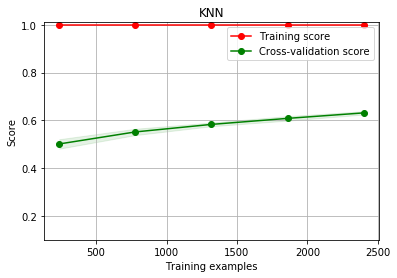

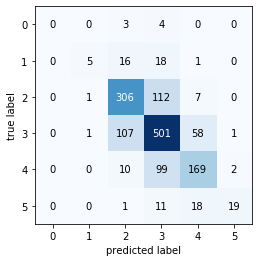

In [114]:
knn = KNeighborsClassifier()
knnclf = classification("KNN",knn,X_train, X_test, y_train, y_test)

##### Classification using Naive Bayes

naïve Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong (naïve) independence assumptions between the features. 
Naïve Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of variables (features/predictors) in a learning problem. Maximum-likelihood training can be done by evaluating a closed-form expression,which takes linear time, rather than by expensive iterative approximation as used for many other types of classifiers. 

Best Parameters for NB:  GaussianNB(priors=None, var_smoothing=1e-09)
Best Score for NB:  0.43524760060437107
------------------------------------------
Mean Accuracy of Cross Validation: % 44.05
Std of Accuracy of Cross Validation: % 3.0
------------------------------------------
Accuracy of Naive Bayes : 42.38095238095238
Confusion matrix of Naive Bayes :
 [[  1   1   3   1   1   0   0]
 [  1   8  14   9   8   0   0]
 [  2  28 250  88  58   0   0]
 [  2   9 200 188 261   7   1]
 [  0   1  38  57 176   8   0]
 [  1   1   2   7  38   0   0]
 [  0   0   0   0   0   0   0]]


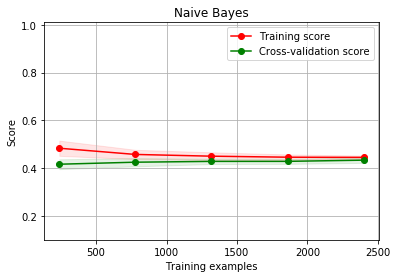

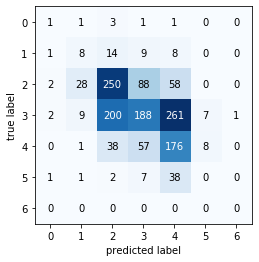

In [115]:
gnb = GaussianNB()
gnbclf = classification("Naive Bayes",gnb,X_train, X_test, y_train, y_test)

##### Classification using Random Forest- Ensemble Bagging Classifier

Random forest: baging ensemble Algorithm- the decision tree Random forests construct many individual decision trees at training and it uses the simplicity of decision trees with flexibility resulting in improvement the accuracy. **Predictions from all trees are pooled to make the final prediction; the mode of the classes for classification or the mean prediction for regression. As they use a collection of results to make a final decision.** Random forest algorithm contains many variables, and many categorical variables with a large number of class labels. **It gives results using data sets that show a loss or unbalanced distribution.** When new trees are added into the random forest, algorithm updates itself with decreasing the loss by eliminating noises. Bootstraping the sample data(creating some mini sample dataset with less variable), then calcuating with regression to the gini then pick the highly correlated, therefore first 2-3 split will be the same because of the central limit theorem because the variance of the sum is decreasing.

Best Parameters for Random Forest:  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Best Score for Random Forest:  0.5927594645783235
------------------------------------------
Mean Accuracy of Cross Validation: % 59.16
Std of Accuracy of Cross Validation: % 2.0
------------------------------------------
Accuracy of Random_Forest : 59.455782312925166
Confusion matrix of Random_Forest :
 [[  0   0   2   5   0   0]
 [  0   1  20  19   0   0]
 [  0   0 277 146   3   0]
 [  0   0 137 502  29   0]
 [  0 

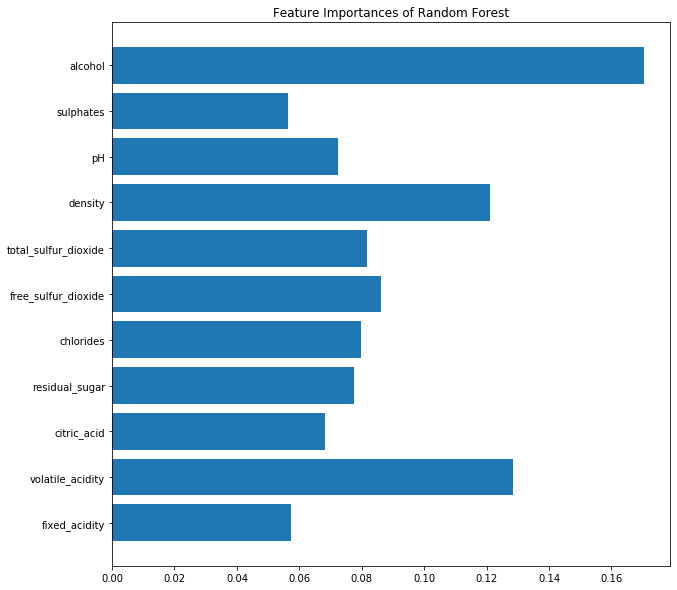

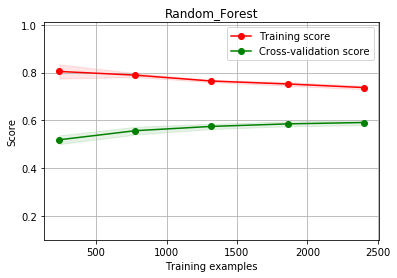

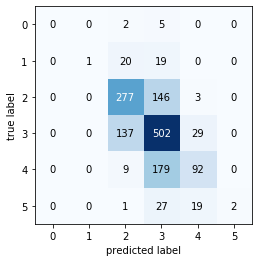

In [116]:
rf = RandomForestClassifier()
rfclf = classification("Random_Forest",rf,X_train,X_test,y_train,y_test)

In [125]:
estimater = [lgclf,dtclf,rfclf,gnbclf,svmclf,knnclf]
model = ["Logistic Regression","Decision Tree","Random Forest","Naive Bayes","SVM","KNN"]
#estimater = [lgclf,dtclf,rfclf,gnbclf,knnclf]
#model = ["Logistic Regression","Decision Tree","Random Forest","Naive Bayes","KNN"]
for i,j in zip(model,estimater):
    print("Accuracy of {n1} : {n2}".format(n1 = i,n2 = round((metrics.accuracy_score(y_test,j.predict(X_test))*100),2)) + "%")

Accuracy of Logistic Regression : 54.08%
Accuracy of Decision Tree : 53.88%
Accuracy of Random Forest : 59.46%
Accuracy of Naive Bayes : 42.38%
Accuracy of KNN : 68.03%


We can see that best accuracy we got from KNN.

In [126]:
df_wine.groupby("quality").size()

quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
dtype: int64

### Improve the dataset responce variable "quality"

This dataset can be proper for classification and regression techniques because the data is multivariate, contains numeric values as an input and output value is ordered and not balanced means that there are much more normal wines than excellent or poor ones. As it seems from the figure in above, data is not balanced. For this reason, it is more important to make data balanced so that our model can work more precicely with new data.

**Categorize wine quality--Good wine represented by 1, bad wine represented by 0**

In [214]:
df_wine.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [215]:
## How to use bin--https://pbpython.com/pandas-qcut-cut.html
bins = (2,6.8,9)
group_names = ['bad','good']
categories = pd.cut(df_wine['quality'], bins, labels = group_names)
df_wine['review'] = categories

In [216]:
df_wine.groupby("quality").size()

quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
dtype: int64

In [217]:
df_wine.review.value_counts()

bad     3838
good    1060
Name: review, dtype: int64

In [218]:
df_wine.drop("review",inplace=True,axis=1)

Now my data seems with the "review" dimension as still unbalanced.Still seems like we have to make it multiclass using one more categorical output like avegare quality.
Lets split in the following way. 

3,4,5 --> Bad

6 --> Average

8,9--> Good

In [219]:
#Create an empty list called Reviews
review = []
for i in df_wine["quality"]:
    if i >= 3 and i <= 5:
        review.append('1')
    elif i == 6:
        review.append('2')
    elif i > 6 and i <= 9:
        review.append('3')
df_wine["review"] = review

In [220]:
df_wine.groupby("review").size()

review
1    1640
2    2198
3    1060
dtype: int64

Now my data seems with the "review" dimension is still not balanced. So we will use only two category good or bad as we used just before this.


In [221]:
## Lets again Categorize wine quality--Good wine represented by 1, bad wine represented by 0
bins = (2,6.5,9)
group_label = [1,0]  ##    1 == good and 0 == bad
df_wine["review"] = pd.cut(df_wine["quality"],bins=bins ,labels= group_label)

In [222]:
df_wine.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'review'],
      dtype='object')

In [223]:
df_wine.groupby("review").size()

review
1    3838
0    1060
dtype: int64

In [224]:
## Now drop the quality column
df_wine_rew = df_wine.drop("quality",axis=1)

In [225]:
df_wine_rew.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000


In [226]:
df_wine_rew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed_acidity         4898 non-null   float64 
 1   volatile_acidity      4898 non-null   float64 
 2   citric_acid           4898 non-null   float64 
 3   residual_sugar        4898 non-null   float64 
 4   chlorides             4898 non-null   float64 
 5   free_sulfur_dioxide   4898 non-null   float64 
 6   total_sulfur_dioxide  4898 non-null   float64 
 7   density               4898 non-null   float64 
 8   pH                    4898 non-null   float64 
 9   sulphates             4898 non-null   float64 
 10  alcohol               4898 non-null   float64 
 11  review                4898 non-null   category
dtypes: category(1), float64(11)
memory usage: 425.9 KB


In [231]:
#Now seperate the wine dataset as response variable("quality") and feature variabes
X_rew = df_wine_rew.drop("review",axis=1)
y_rew = df_wine_rew["review"]

In [232]:
print(X_rew.shape)
print(y_rew.shape)
print(type(X_rew))
print(type(y_rew))

(4898, 11)
(4898,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [233]:
X_rew_scale = normalization(X_rew)

In [234]:
X_rew_scale

array([[ 1.72096961e-01, -8.17699008e-02,  2.13280202e-01, ...,
        -1.24692128e+00, -3.49184257e-01, -1.39315246e+00],
       [-6.57501128e-01,  2.15895632e-01,  4.80011213e-02, ...,
         7.40028640e-01,  1.34184656e-03, -8.24275678e-01],
       [ 1.47575110e+00,  1.74519434e-02,  5.43838363e-01, ...,
         4.75101984e-01, -4.36815783e-01, -3.36667007e-01],
       ...,
       [-4.20473102e-01, -3.79435433e-01, -1.19159198e+00, ...,
        -1.31315295e+00, -2.61552731e-01, -9.05543789e-01],
       [-1.60561323e+00,  1.16673788e-01, -2.82557040e-01, ...,
         1.00495530e+00, -9.62604939e-01,  1.85757201e+00],
       [-1.01304317e+00, -6.77100966e-01,  3.78559282e-01, ...,
         4.75101984e-01, -1.48839409e+00,  1.04489089e+00]])

In [235]:
df_X_rew_scale = pd.DataFrame(X_rew_scale,columns = X_cols)

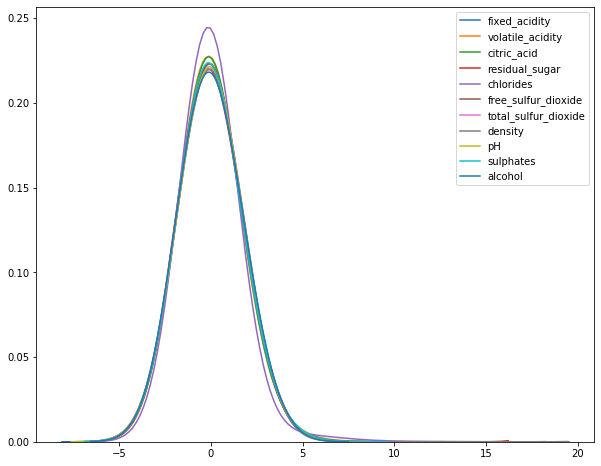

In [236]:
plt.figure(figsize=(10,8))
i = []
for i in X_cols:
    sns.kdeplot(df_X_rew_scale[i],bw=1.5)

In [237]:
### Lets split the train and test
X_rew_train,X_rew_test,y_rew_train,y_rew_test = train_test_split(X_rew_scale,y_rew,test_size = 0.3,random_state = 42)

In [238]:
print(X_rew_train.shape)
print(y_rew_train.shape)
print(X_rew_test.shape)
print(y_rew_test.shape)

(3428, 11)
(3428,)
(1470, 11)
(1470,)


### Lets again apply the ML model and check the accuracy

Best Parameters for Logistic Regression:  LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Best Score for Logistic Regression:  0.8080504777510586
------------------------------------------
Mean Accuracy of Cross Validation: % 80.75
Std of Accuracy of Cross Validation: % 1.0
------------------------------------------
Accuracy of Logistic_Regression : 78.91156462585033
Confusion matrix of Logistic_Regression :
 [[  79  250]
 [  60 1081]]


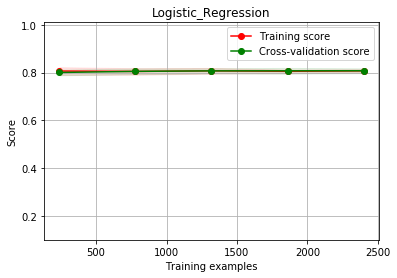

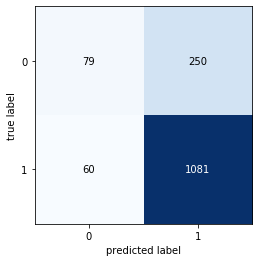

In [243]:
logreg = LogisticRegression()
lgclf_rew = classification("Logistic_Regression",logreg,X_rew_train,X_rew_test,y_rew_train,y_rew_test)

Best Parameters for Decision Tree:  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Best Score for Decision Tree:  0.8100895916239279
------------------------------------------
Mean Accuracy of Cross Validation: % 79.96
Std of Accuracy of Cross Validation: % 1.0
------------------------------------------
Accuracy of Decision_Tree : 79.93197278911565
Confusion matrix of Decision_Tree :
 [[ 117  212]
 [  83 1058]]


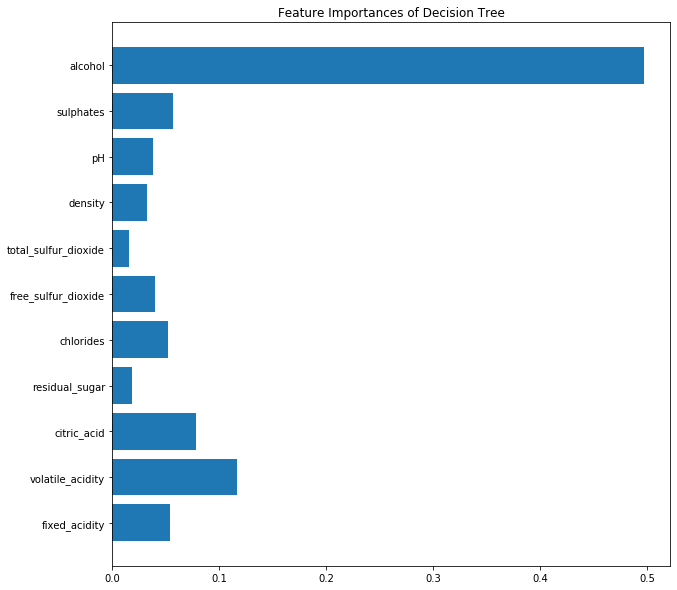

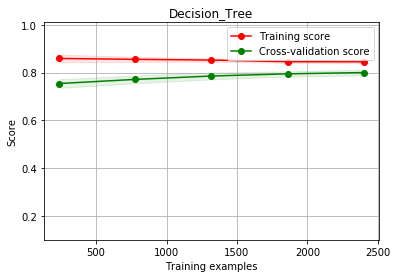

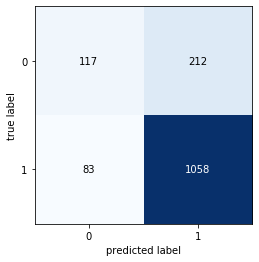

In [244]:
dtree = DecisionTreeClassifier()
dtclf_rew = classification("Decision_Tree",dtree,X_rew_train,X_rew_test,y_rew_train,y_rew_test)

Best Parameters for Random Forest:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Best Score for Random Forest:  0.8448068779127919
------------------------------------------
Mean Accuracy of Cross Validation: % 83.87
Std of Accuracy of Cross Validation: % 1.0
------------------------------------------
Accuracy of Random_Forest : 85.64625850340136
Confusion matrix of Random_Forest :
 [[ 161  168]
 [  43 1098]]


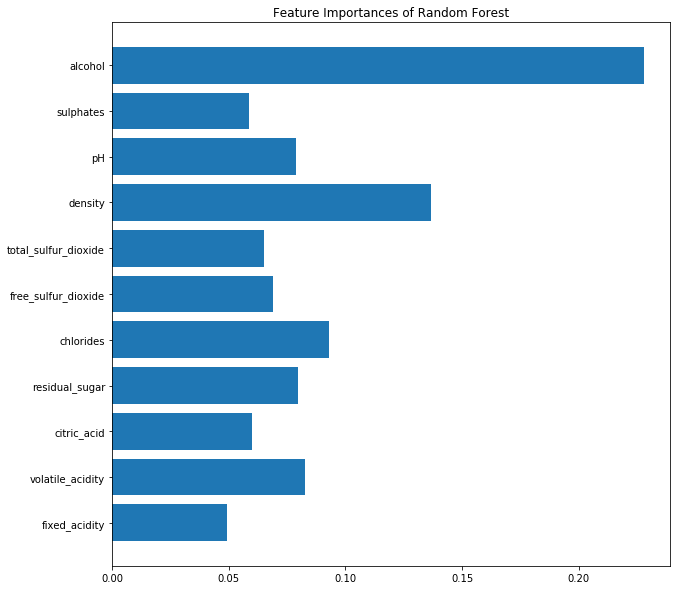

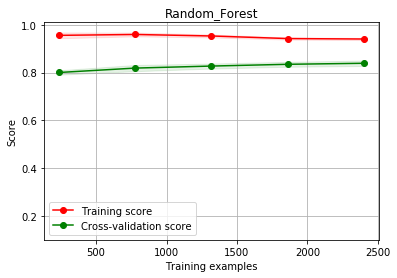

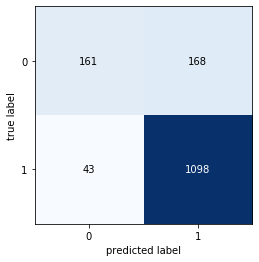

In [249]:
rf = RandomForestClassifier()
rfclf_rew = classification("Random_Forest",rf,X_rew_train,X_rew_test,y_rew_train,y_rew_test)

Best Parameters for NB:  GaussianNB(priors=None, var_smoothing=1e-09)
Best Score for NB:  0.733960120022983
------------------------------------------
Mean Accuracy of Cross Validation: % 73.37
Std of Accuracy of Cross Validation: % 2.0
------------------------------------------
Accuracy of Naive Bayes : 70.54421768707483
Confusion matrix of Naive Bayes :
 [[225 104]
 [329 812]]


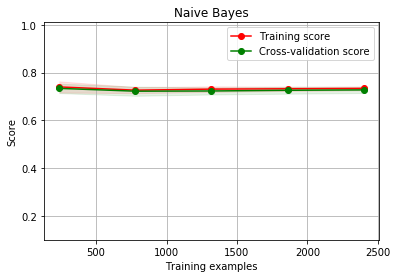

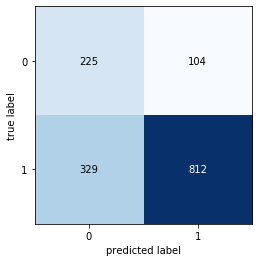

In [245]:
gnb = GaussianNB()
gnbclf_rew = classification("Naive Bayes",gnb,X_rew_train,X_rew_test,y_rew_train,y_rew_test)

In [246]:
svc = svm.SVC()
svmclf_rew = classification("SVM",svc,X_rew_train,X_rew_test,y_rew_train,y_rew_test)

Best Parameters for KNN:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                     weights='distance')
Best Score for KNN:  0.8602672852248302
------------------------------------------
Mean Accuracy of Cross Validation: % 85.53
Std of Accuracy of Cross Validation: % 1.0
------------------------------------------
Accuracy of KNN : 86.66666666666667
Confusion matrix of KNN :
 [[ 186  143]
 [  53 1088]]


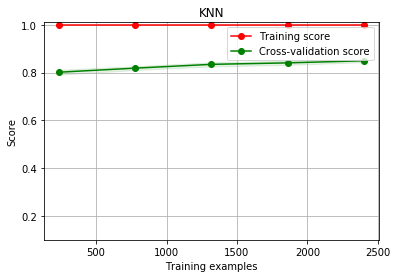

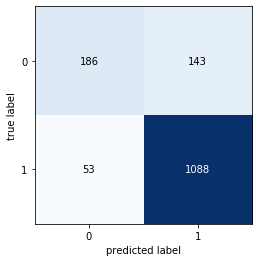

In [247]:
knn = KNeighborsClassifier()
knnclf_rew = classification("KNN",knn,X_rew_train,X_rew_test,y_rew_train,y_rew_test)

In [253]:
estimater_rew = [lgclf_rew,dtclf_rew,rfclf_rew,gnbclf_rew,svmclf_rew,knnclf_rew]
model_rew = ["Logistic Regression","Decision Tree","Random Forest","Naive Bayes","SVM","KNN"]
#estimater_rew = [lgclf_rew,dtclf_rew,rfclf_rew,gnbclf_rew,knnclf_rew]
#model_rew = ["Logistic Regression","Decision Tree","Random Forest","Naive Bayes","KNN"]
print("Below are the Model accuracy when we categorized the quality column in good or bad")
for i,j in zip(model_rew,estimater_rew):
    print("Accuracy of {n1} : {n2}".format(n1 = i,n2 = round((metrics.accuracy_score(y_rew_test,j.predict(X_rew_test))*100),2)) + "%")

Below are the Model accuracy when we categorized the quality column in good or bad
Accuracy of Logistic Regression : 78.91%
Accuracy of Decision Tree : 79.93%
Accuracy of Random Forest : 85.65%
Accuracy of Naive Bayes : 70.54%
Accuracy of KNN : 86.67%


**Conclusion**

For this work, it was aimed that the analyzing which psychochemical are more related with wine quality and which approach is good for prediction of wine quality better. After all work, it is obvious that working with **binary classification is more better the predict good or bad wines**.

From all algorithms, it was obvious that for this dataset, KNN,SVM and then Random Forest algorithm gave the best model and accuracy means that those algorithms predict correctly test data. 

** Alcohol is the most important feature to decide quality of the wine. If the alcohol percentage is high enough, it means that quality of the wine should be better